In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_insurrance = pd.read_csv('/content/insurance (1).csv')

In [ ]:
df_insurrance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_insurrance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_insurrance.shape

(1338, 7)

In [ ]:
df_insurrance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null value in given dataset

In [ ]:
df_insurrance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. Very less people have morer than 2 children
2. The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of


Now lets see the distribution of age, BMI and Charges individually given below 

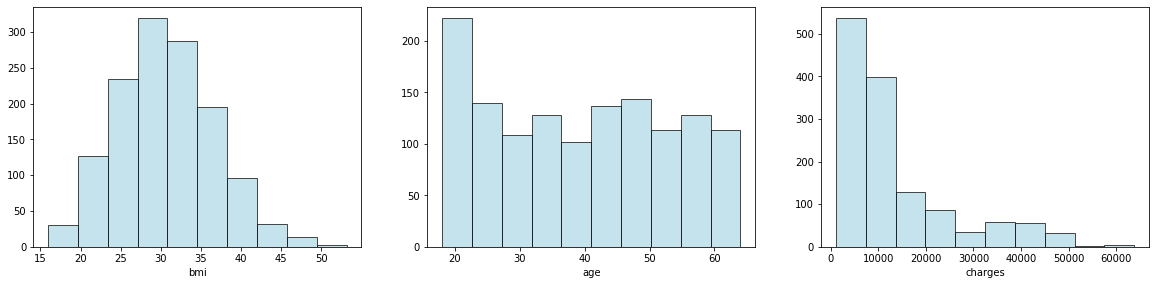

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df_insurrance.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df_insurrance.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df_insurrance.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

The above plots shows the 
1. BMI plot is normally distributes
2. Age plot is quite unifrmaly distributed
3. In case of Charges plot it is highly skewed

In [ ]:
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_insurrance.bmi),stats.skew(df_insurrance.age),stats.skew(df_insurrance.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


In [ ]:
# Now we check for the outliers

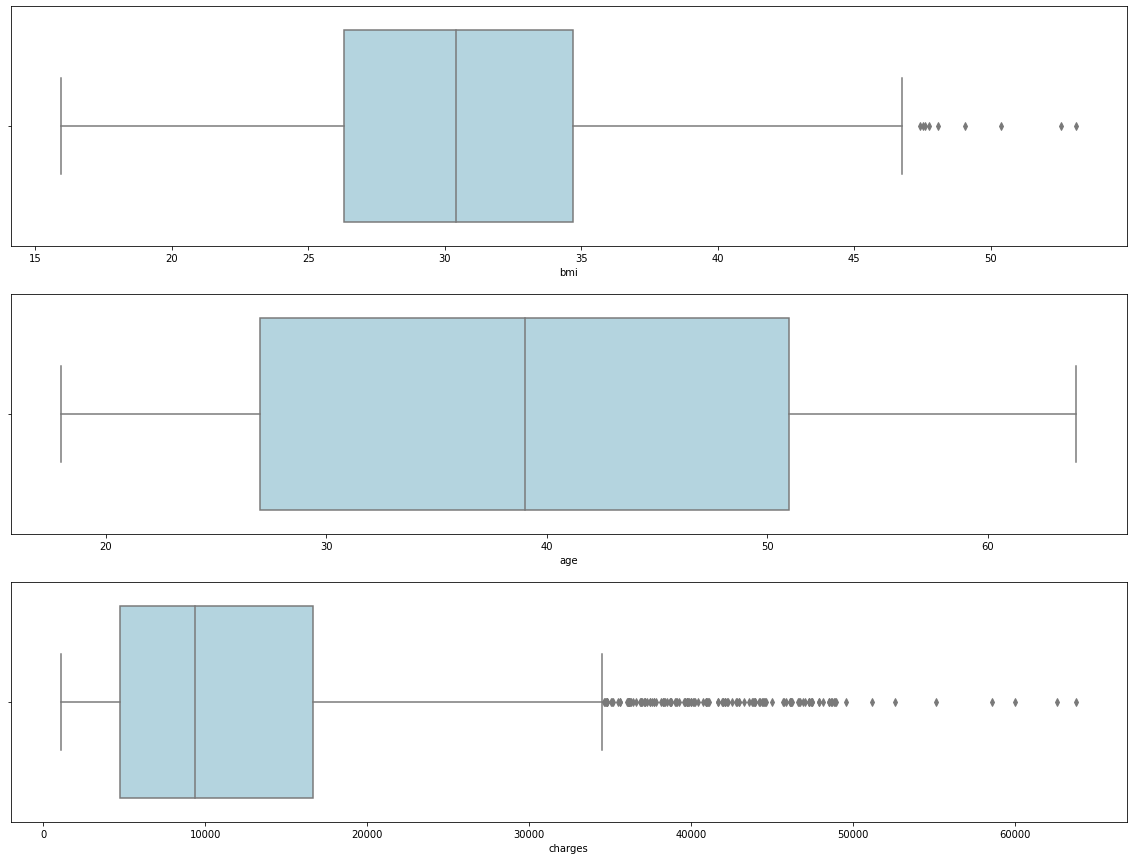

In [ ]:
#Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df_insurrance.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df_insurrance.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df_insurrance.charges, color='lightblue')

plt.show()

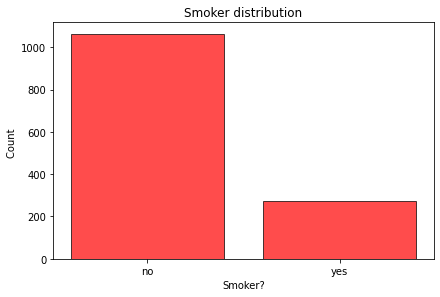

In [ ]:
plt.figure(figsize=(15,20))


x = df_insurrance.smoker.value_counts().index    #Values for x-axis
y = [df_insurrance['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')
plt.show()

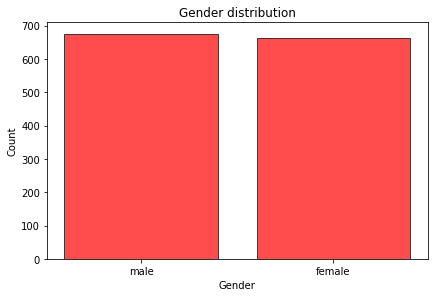

In [ ]:
plt.figure(figsize=(15,20))
x1 = df_insurrance.sex.value_counts().index    #Values for x-axis
y1 = [df_insurrance['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')
plt.show()

Q1. 1.	Does BMI of males differ significantly from that of females?

In [ ]:
df_insurrance.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


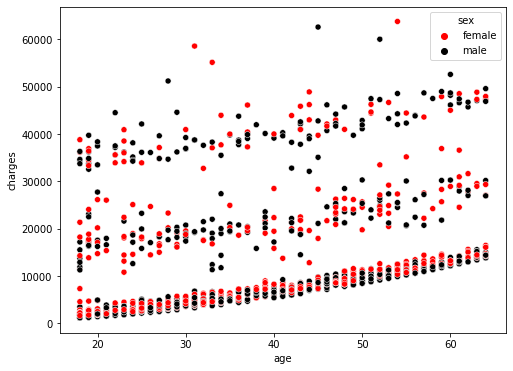

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_insurrance.age, df_insurrance.charges,hue=df_insurrance.sex,palette= ['red','black'] )
plt.show()

In [ ]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df_insurrance[df_insurrance.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df_insurrance[df_insurrance.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t,p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


Q2. Is the proportion of smokers significantly different in different genders?

In [ ]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df_insurrance['sex'],df_insurrance['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159
